In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering

## K-means

The scikit-learn library has an implementation of the k-means algorithm. Let’s apply it to a set of randomly generated blobs, whose labels we throw away. 

make_blobs() function generates a data set for clustering. Investigate the shape of the X https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

__TO DO__: Find out how many instances with how many features were generated.

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42) 
print(X.shape)

(100, 2)


__TO DO__: Plot the points X with a scatter plot

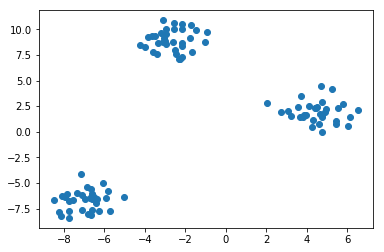

In [3]:
plt.scatter(X[:,0],X[:,1]);

In this toy example you can guess the number of clusters. Let’s see if the k-means algorithm can recover these clusters. 

__TO DO__: Import KMeans and create the instance of the k-means model by giving it the number of clusters 3 as a hyperparameter. Fit the model to your dataset X. Notice that we do not feed labels y into the model. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

__TO DO__: assign centroids to the variable centroids and print it. Use KMeans model's attribute cluster_centers_. 

- The centroids are important because they are what enables KMeans to assign new, previously unseen points to the existing clusters

In [5]:
centroids = model.cluster_centers_
print(centroids)

[[-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]
 [ 4.49951001  1.93892013]]


__TO DO__: assign predicted class labels to the variable labels and print it. Use KMeans model's attribute labels_

In [6]:
labels = model.labels_
print(labels)

[0 2 1 2 0 2 1 2 2 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 2 0 0 0 0 2 2 0 1 1 1
 1 2 2 0 1 2 1 1 2 0 0 0 2 2 2 1 0 0 0 1 1 2 1 0 2 0 2 0 0 2 0 2 2 2 0 0 1
 2 0 2 0 2 2 1 2 1 0 1 1 1 2 1 2 2 2 1 2 1 1 1 2 0 1]


__TO DO__: Plot the points X with a scatter plot with colors equal to labels. The pre-filled line plots the centroids with a red dot.

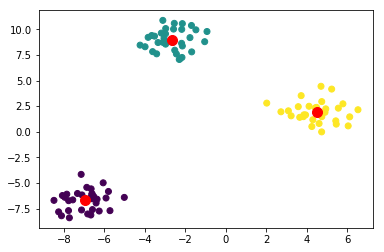

In [7]:
plt.scatter(X[:,0],X[:,1], c=labels);
plt.scatter(centroids[:,0], centroids[:,1], s=100, color="red"); # Show the centres

__TO DO__: return KMeans' performance measure inertia  with an attribute inertia_

- inertia = Sum of squared distances of samples to their closest cluster center. The lower the inertia the better. 

In [8]:
model.inertia_

171.91098459057724

Select the number of clusters where inertia does not decrease significantly anymore = Elbow rule.

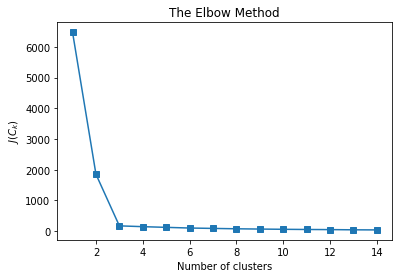

In [9]:
inertia = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(km.inertia_)
    
plt.plot(range(1, 15), inertia, marker='s');
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('$J(C_k)$');

__TO DO__: Use the .predict() method of model to predict the cluster labels of new_points. Assign them to new_labels variable and print them. Notice that KMeans can assign previously unseen points to the clusters it has already found!

[1 0 2 1]


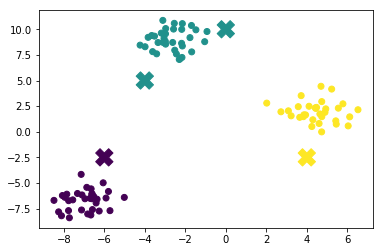

In [10]:
new_points = np.array([[-4, 5], [-6, -2.5], [4, -2.5], [0, 10]])
new_labels = np.array(model.predict(new_points))
print(new_labels)

plt.scatter(X[:,0],X[:,1], c=labels)
plt.scatter(new_points[:,0], new_points[:,1], c=new_labels, marker = 'X', s = 300);

### Scaling, numerical variables

Read the data set below. 

In [11]:
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
customers = pd.read_csv('data/Mall_Customers.csv')
customers.set_index('CustomerID', inplace = True)
customers['Annual Income (k$)'] = customers['Annual Income (k$)']*1000
customers.columns = ['gender', 'age', 'annual_income_$', 'spending_score']
display(customers.head(5))
print(customers.shape)

,gender,age,annual_income_$,spending_score
CustomerID,,,,
1,Male,19,15000,39
2,Male,21,15000,81
3,Female,20,16000,6
4,Female,23,16000,77
5,Female,31,17000,40


(200, 4)


Annual income has a very different scale than other two numerical features. 

For distance based methods scaling helps if the features have very different scales. We will scale here all numerical features with StandardScaler(). It standardizes features by removing the mean and scales to unit variance

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = customers.select_dtypes(exclude='object').columns # get numerical columns
customers[num_cols] = scaler.fit_transform(customers[num_cols]) # apply scaler to numerical columns
customers.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,gender,age,annual_income_$,spending_score
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980


__TO DO__: fit the KMeans() model to the customers dataset. You will get an error.Proceed with the next cell after the error.

In [13]:
KMeans(n_clusters=2, random_state=42).fit(customers)

ValueError: could not convert string to float: 'Male'

What is the problem here? We have to transform non-numerical columns to numerical ones as it is not possible to calculate a distance between non-numerical features.

In [14]:
# select only non-numerical columns with select_dtypes() method
non_num_cols = customers.select_dtypes(include='object').columns

# use LabelEncoder from scikit learn preprocessing module to encode values from non-numerical columnns to numerical
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in non_num_cols:
    customers[col + '_encoded'] = le.fit_transform(customers[non_num_cols])
    
# drop non-numerical columns
customers.drop(columns = non_num_cols, inplace=True)
display(customers.head())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,annual_income_$,spending_score,gender_encoded
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1
2,-1.281035,-1.738999,1.195704,1
3,-1.352802,-1.700830,-1.715913,0
4,-1.137502,-1.700830,1.040418,0
5,-0.563369,-1.662660,-0.395980,0


__TO DO__: Fit the KMeans model again to the customers data

In [15]:
KMeans().fit(customers).labels_

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 7, 0, 1, 0,
       4, 0, 1, 5, 5, 5, 1, 5, 5, 7, 1, 1, 1, 7, 5, 1, 7, 5, 7, 1, 7, 5,
       1, 7, 5, 5, 7, 1, 7, 7, 7, 5, 1, 1, 5, 1, 7, 1, 7, 1, 5, 1, 1, 5,
       5, 1, 7, 5, 1, 1, 5, 5, 1, 5, 1, 5, 5, 1, 7, 5, 1, 5, 7, 1, 7, 7,
       7, 5, 1, 5, 5, 5, 7, 1, 1, 1, 5, 1, 1, 2, 5, 2, 1, 2, 6, 2, 3, 2,
       5, 2, 3, 2, 6, 2, 3, 2, 6, 2, 5, 2, 3, 2, 1, 2, 3, 2, 3, 2, 6, 2,
       6, 2, 3, 2, 3, 2, 6, 2, 3, 2, 6, 2, 3, 2, 6, 2, 3, 2, 3, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 3, 2, 6, 2, 6, 2,
       6, 2])

## DBSCAN

Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [31]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

Import dataset and plot it. Clearly there should be two clusters

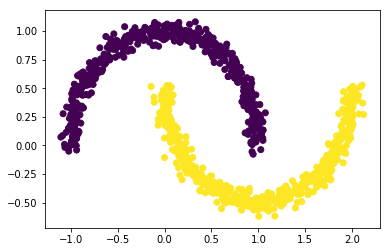

In [32]:
x_moons, y_moons = datasets.make_moons(n_samples=1000, noise=0.05,random_state=42)
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=y_moons);

KMeans fails to find appropriate clusters as it searches for convex shapes. See below.

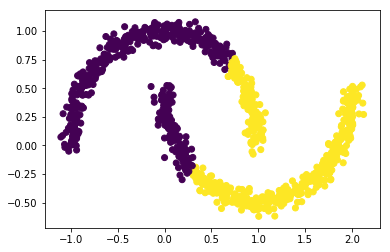

In [33]:
kmeans_labels = KMeans(2).fit(x_moons).labels_
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=kmeans_labels);

__TO DO__: Initiate DBSCAN, assign to dbscan variable and fit the model with eps=0.05 and min_samples=5.  

In [34]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x_moons)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

__TO DO__: Return labels of dbscan with an attribute labels_ and assign the labels to dbscan_labels variable

In [37]:
dbscan_labels = dbscan.labels_

Notice that there are labels = -1. These denote outliers

In [38]:
unique, counts = np.unique(dbscan_labels, return_counts=True)
display(pd.DataFrame(np.asarray((unique, counts)).T, columns = ['labels', 'frequency']))

,labels,frequency
0,-1,77
1,0,186
2,1,77
3,2,271
4,3,125
5,4,104
6,5,96
7,6,64


The clusters and outliers on a plot

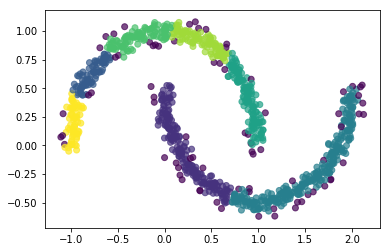

In [39]:
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=dbscan_labels, alpha=0.7);

__TO DO__: indices of the core instances are available in the core_sample_indices_ attribute. Assign them to comps_idx variable

In [22]:
comps_idx = dbscan.core_sample_indices_

The core instances are stored in the components_ attribute. Below we create a mask for indices which are core instances

In [23]:
print(dbscan.components_)

comps_idx_boolean = np.array([(i in comps_idx) for i in range(len(x_moons))]) # this creates a boolean mask for core instances 

[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


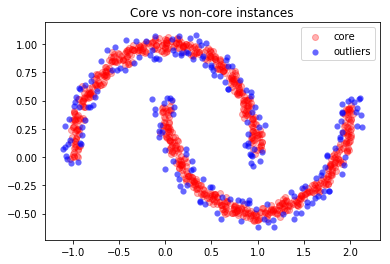

In [40]:
plt.scatter(x_moons[comps_idx_boolean, 0], x_moons[comps_idx_boolean, 1], c='r', alpha=0.3, label='core')
plt.scatter(x_moons[~comps_idx_boolean, 0], x_moons[~comps_idx_boolean, 1], c='b', alpha=0.6, linewidths = 0.1, label='outliers')
plt.legend()
plt.title('Core vs non-core instances');

The DBSCAN clustering did not return expected results. Let's try different eps and min_samples

__TO DO__: fit DBSCAN again with eps=0.2 and min_samples=5. Plot the resulting clusters

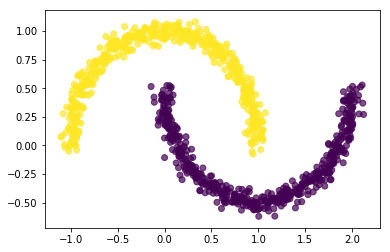

In [25]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(x_moons)
dbscan_labels = dbscan.labels_
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=dbscan_labels, alpha=0.7);

notice that DBSCAN class does not have .predict() method although it has a fit_predict() method. It cannot predict a cluster for a new instance

In [26]:
dbscan.predict(x_moons)

AttributeError: 'DBSCAN' object has no attribute 'predict'